# Math 351 Assignment 5



# Problem 1 - Fundamental theorem of Calculus, with noise

In this question, we'll examine the effect of small measurement errors on numerical differentiation and integration.

(a) Let $x_i$ $(0 \leq i \leq 100)$ be 101 equally spaced points between 0 and 1, 
Using numpy's random.rand() function, generate a list of 101 random $y$ coordinates in the range $[-0.05,0.05]$.   Do this in a different cell than you do (b) and (c), so that Jupyter doesn't keep re-randomizing your data as you work on your homework.

(b) Let $g(x)$ be a continuous function such that $g(x_i) = y_i$ for all $i$.  Numerically approximate the values of
$$
f(x) := g'(x)  \qquad \text{and} \qquad h(x) = \int_{0}^x g(t)\;dt
$$
Use the usual Newton's quotient $$\frac{g(x+h)-g(x)}{h}$$ to compute f, and use the trapezoid rule to compute h.
Plot graphs of $f$, $g$ and $h$ on the same axes.  Explain the features of the graphs that you see.

(c) The fundamental theorem of calculus says that if you differentiate an integral, you should get the original function back, right?  So perhaps the same is roughly true for these numerically computed approximations.  Compute
$$
h'(x) \qquad \text{and} \qquad \int_{0}^x f(t)\;dt
$$
using the same numerical methods,and compare them to $g(x)$.  Explain the results.




In [2]:
import numpy as np
import sympy as sy
eqxs = []
eqys = []
for i in range(101):
    eqxs.append(i/101)
    eqys.append(np.random.rand()*0.1 - 0.05)

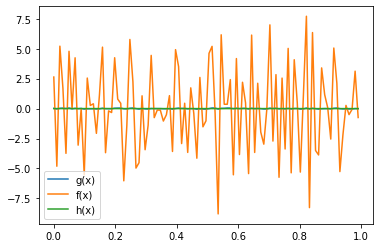

In [14]:
from matplotlib import pyplot as plt
from sympy.abc import x

def g(x):
    xindex = (int)(x * 101)
    return eqys[xindex-1]

def f(x, h):
    return (g(x+h) - g(x))/ h

def h(x):
    xindex = (int)(x*101)
    runtotal = 0
    for i in range(xindex-1):
        runtotal += 0.5*(eqys[i] + eqys[i+1])*(1/100)
    return runtotal
        

fvals = []
hvals = []
for i in range(101):
    fvals.append(f(eqxs[i], 1/101))
    hvals.append(h(eqxs[i]))
    
plt.plot(eqxs, eqys)
plt.plot(eqxs, fvals)
plt.plot(eqxs, hvals)
plt.legend(['g(x)', 'f(x)', 'h(x)'])
plt.show()

# A.)
See the graph above

# B.)
The graph of f(x) fluctuates wildly since the slope of g(x) changes between random positive and negative values for each value of x between 0 and 1. Meanwhile, g(x) stays between -0.005 and 0.005 as depicted in the problem description. h(x) increases slowly, since with this instance of randomized y values, there were more positive y-values than negative y-values, and as such h(x) gains a positive value over the interval [0 to 1].

# C.)
See graph below.  
We see that reverting the operations performed on these functions gives us a fairly close estimate to the original function g(x). In particular, integrating f(x) produced a set of values that had the same general shape as g(x), but with different amplitudes and lagging slightly behind. A similar trend can be seen when we take the derivative of the integration of g(x). A similar shape is produced, but with slightly different amplitudes.

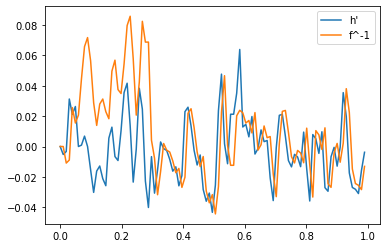

In [25]:
def fint(x):
    xindex = (int)(x*101)
    runtotal = 0
    for i in range(xindex-1):
        runtotal += 0.5*(fvals[i] + fvals[i+1])*(1/100)
    return runtotal

def hprime(x, k):
    return (h(x+k) - h(x))/ k

hpvals = []
fintvals = []

for i in range(101):
    hpvals.append(hprime(i/101, 1/101))
    fintvals.append(fint(eqxs[i]))
    
plt.plot(eqxs, hpvals)
plt.plot(eqxs, fintvals)
#plt.plot(eqxs, eqys) # This line may be toggled to compare h' and f^-1 to g(x) true values
plt.legend(['h\'', 'f^-1', 'g'])
plt.show()

# Problem 3 - Arc Length

Consider an ellipse with major radius 3 and minor radius 1.  

(a) Write a parametric equation for this ellipse.  That is, find functions $x(t), y(t)$ $(0 \leq t \leq 1)$ such that the ellipse is the set of points $$\{(x(t), y(t)) \;|\; 0 \leq t \leq 2\pi\}.$$  It'll be like the usual one for the circle.  Then, draw a parametric plot using your equation: it is, hopefully, a picture of the ellipse.

(b) Now suppose that $t$ represents time, so that your parametric equation represents the location of a point travelling around the ellipse.  Plot graphs of the speed, and acceleration, of this point.  Is the speed constant?

(c) For $0<=a<b<=1$, write a procedure to find the arc length of the ellipse between $t=a$ and $t=b$.  Use your procedure to find $L$, the perimeter of the ellipse.

(d) Reparameterize the ellipse by arclength.  That is, find a function  $t:[0,L] \rightarrow [0,1]$  such that the point $(x(t(s)), y(t(s))$ is moving at speed 1 over the range $0 \leq s \leq L$.  You'll have to do this numerically, so your function $t$ will really just be a list of points in the interval [0,L].  

(e) Find 13 points on the ellipse $p_1 \ldots p_{13}$, again numerically, which divide the ellipse into thirteen segments of equal arc length.  Scatter plot them on the ellipse.




1 	t 0.0 		arclen 0 		arclen - arc 0
2 	t 0.7264933011426397 		arclen 0.0795146705752390 		arclen - arc 0.00259159365216205
3 	t 1.1388273369263 		arclen 0.155683393432922 		arclen - arc 0.00183723958676849
4 	t 1.4922565104551517 		arclen 0.232386375084831 		arclen - arc 0.00161714431560017
5 	t 1.8456856839840035 		arclen 0.311016783029970 		arclen - arc 0.00332447533766228
6 	t 2.2187498115977915 		arclen 0.386655942865684 		arclen - arc 0.00204055825029981
7 	t 2.7292586178061327 		arclen 0.463320325927202 		arclen - arc 0.00178186438874062
8 	t 3.5735616434583894 		arclen 0.538928490988325 		arclen - arc 0.000466952526786080
9 	t 4.084070449666731 		arclen 0.616990669225529 		arclen - arc 0.00160605384091339
10 	t 4.457134577280519 		arclen 0.693254031833722 		arclen - arc 0.000946339526029960
10 	t 4.81056375080937 		arclen 0.772005715061545 		arclen - arc 0.00277494583077575
11 	t 5.163992924338222 		arclen 0.848350034438737 		arclen - arc 0.00219618828489110
12 	t 5.57632696012

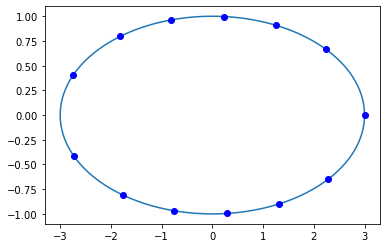

In [81]:
from sympy.abc import x, y, t

t = np.arange(0, 2*np.pi, np.pi/160)
x = sy.Symbol('x')

xt = 3 * np.cos(t)
yt = np.sin(t)

xp = -3 * np.sin(t)
yp = np.cos(t)

xacc = -3 * np.cos(t)
yacc = np.sin(t)

speed = (xp**2 + yp**2)**0.5
accelmag = (xacc**2 + yacc**2)**0.5

speedx = -3 * sy.sin(x)
speedy = sy.cos(x)
speedfunc = (speedx**2 + speedy**2)**0.5

def findarc(theta, a, b):
    return sy.integrate(speedfunc, (x, a, b)).evalf(subs={x:theta})

NUMARCS = 13
L = findarc(t, 0, np.pi*2)
tfunct = []
critts = []
critx = []
crity = []
equalarc = 1 / NUMARCS
arc = 0

for tval in t:
    arclen = findarc(t, 0, tval) / L
    tfunct.append(arclen)

    if (arclen - arc < 5e-3 and arclen - arc >= 0):
        print((int)(arc/equalarc) + 1, "\tt", tval, "\t\tarclen", arclen, "\t\tarclen - arc", arclen - arc)
        arc = arc + equalarc
        critts.append(tval)
        critx.append(3 * np.cos(tval))
        crity.append(np.sin(tval))
        
# def newfunct(s):
#     aval = s / L # % of perimeter that s represents
#     for tk in t:
#         if (findarc(t, 0, tk) / L == aval): # Finds the value of t such that arclen(t) = same %
#             return tk
        
plt.plot(xt, yt)
plt.plot(critx, crity, 'bo')
plt.show()

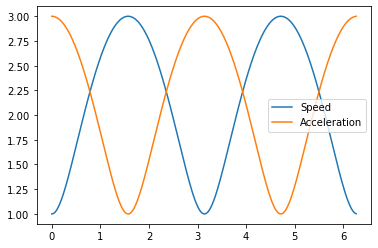

In [71]:
xt = 3 * np.cos(t)
yt = np.sin(t)

xp = -3 * np.sin(t)
yp = np.cos(t)

xacc = -3 * np.cos(t)
yacc = np.sin(t)

speed = (xp**2 + yp**2)**0.5
accelmag = (xacc**2 + yacc**2)**0.5

plt.plot(t, speed)
plt.plot(t, accelmag)
plt.legend(['Speed', 'Acceleration'])
plt.show()

# A.)
See the ellipse in the graph above

# B.)
See graph above for speed & acceleration.  
The speed in this graph is not constant, but instead fluctuates, reaching peaks around areas with the least acceleration.

# C.)
See method 'findarc' above.

# D.)
The list of values labeled 'tfunct' is a representation of the points needed to create a function t:[0, L] -> [0, 1]. It takes an arc length for a given value of s in [0, L] and returns that length divided by the ellipse's perimeter. This tells us how far along we are in traversing the perimeter of our ellipse as a percentage, which we can then multiply by 2pi to find the value of t that we're looking for.  
That value of t can then be used in x(t) and y(t), as performed above.

# E.)
See points scattered on the ellipse above.